In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
file_path = 'more_features.csv'

df = pd.read_csv(file_path)

print(df.head())

             LOG_ID            PAT_ID               MRN  Cardiovascular   LOS  \
0  d754f06a7d973a26  837532f458d9c660  0b8de903ea63082a             0.0   1.0   
1  5a95970d5c8fc355  fd18a41f136ed278  0a8b72c1cec4ae47             0.0  10.0   
2  138d44a06cf4b57f  fd18a41f136ed278  0a8b72c1cec4ae47             0.0  10.0   
3  82372dc4703ea1b0  648781c95d863ec6  e0cb9244fedd1ac7             0.0   3.0   
4  4b6aabaf62e85c0a  d1d7b9ddc4962cdf  3918b79e03cefe27             0.0   3.0   

   ICU_ADMIN_FLAG      HEIGHT    WEIGHT  SEX  ASA_RATING_C  ...  \
0               0  187.960000   92.6991    1           2.0  ...   
1               1  168.251459  100.9530    1           3.0  ...   
2               1  168.251459  100.9530    1           3.0  ...   
3               1  160.020000   70.1064    0           2.0  ...   
4               1  168.251459   86.3922    1           2.0  ...   

   ecg_std_magnitude  Calcium  Erythrocyte distribution width  \
0          25.027281        0                

In [3]:
columns_to_scale = df.columns.difference(['LOG_ID', 'PAT_ID', 'MRN'])

scaler = MinMaxScaler(feature_range=(0, 1))

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print(df.head())

             LOG_ID            PAT_ID               MRN  Cardiovascular  \
0  d754f06a7d973a26  837532f458d9c660  0b8de903ea63082a             0.0   
1  5a95970d5c8fc355  fd18a41f136ed278  0a8b72c1cec4ae47             0.0   
2  138d44a06cf4b57f  fd18a41f136ed278  0a8b72c1cec4ae47             0.0   
3  82372dc4703ea1b0  648781c95d863ec6  e0cb9244fedd1ac7             0.0   
4  4b6aabaf62e85c0a  d1d7b9ddc4962cdf  3918b79e03cefe27             0.0   

        LOS  ICU_ADMIN_FLAG    HEIGHT    WEIGHT  SEX  ASA_RATING_C  ...  \
0  0.007692             0.0  0.613636  0.289188  1.0           0.2  ...   
1  0.076923             1.0  0.437289  0.327162  1.0           0.4  ...   
2  0.076923             1.0  0.437289  0.327162  1.0           0.4  ...   
3  0.023077             1.0  0.363636  0.185246  0.0           0.2  ...   
4  0.023077             1.0  0.437289  0.260172  1.0           0.2  ...   

   ecg_std_magnitude   Calcium  Erythrocyte distribution width  \
0           0.077016  0.000000  

In [4]:
columns_list = df.columns
print(columns_list)

Index(['LOG_ID', 'PAT_ID', 'MRN', 'Cardiovascular', 'LOS', 'ICU_ADMIN_FLAG',
       'HEIGHT', 'WEIGHT', 'SEX', 'ASA_RATING_C', 'Abnormal Flag',
       'ORDER_STATUS_IMPACT', 'discharge_risk_level', 'BIRTH_DATE',
       'PATIENT_CLASS_GROUP', 'PATIENT_CLASS_NM', 'systolic_peak',
       'diastolic_peak', 'pulse_amplitude', 'arc_peak_frequency',
       'arc_spectral_energy', 'arc_bandwidth', 'qrs_freq_power',
       'vf_freq_power', 'vt_freq_power', 'qrs_peak_freq', 'ecg_std_magnitude',
       'Calcium', 'Erythrocyte distribution width',
       'Erythrocyte mean corpuscular hemoglobin',
       'Erythrocyte mean corpuscular hemoglobin concentration',
       'Erythrocyte mean corpuscular volume', 'Erythrocytes', 'Hematocrit',
       'Hemoglobin', 'cardiac_history'],
      dtype='object')


In [5]:
wave_path = 'waveform_features.csv'

wave = pd.read_csv(wave_path)

print(wave.head())

             LOG_ID  systolic_peak  diastolic_peak  pulse_amplitude  \
0  00fbb475a02e94c3         252.12           32.00           220.11   
1  011e00acde3a3342       16279.61         1685.74         14593.87   
2  0124e746e00e3b4a        1520.99          189.51          1331.48   
3  01953a9111bff808        1304.10          171.75          1132.35   
4  01dc302bc8104d42        1958.25          290.57          1667.67   

   arc_peak_frequency  arc_spectral_energy  arc_bandwidth  qrs_freq_power  \
0                7.25         8.647745e+09          50.28        25510.29   
1                8.29         1.299503e+14          47.16           50.88   
2                1.55         3.489219e+11          48.78       114719.37   
3               14.92         7.999232e+11          45.24           13.78   
4                0.55         1.034316e+12          45.21           28.66   

   vf_freq_power  vt_freq_power  qrs_peak_freq  ecg_std_magnitude  
0        5649.41       14788.67           

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))

columns_to_normalize = wave.columns.drop('LOG_ID')

wave[columns_to_normalize] = scaler.fit_transform(wave[columns_to_normalize])

print(wave.head())

             LOG_ID  systolic_peak  diastolic_peak  pulse_amplitude  \
0  00fbb475a02e94c3       0.005692        0.007076         0.005534   
1  011e00acde3a3342       0.367523        0.372781         0.366926   
2  0124e746e00e3b4a       0.034337        0.041908         0.033476   
3  01953a9111bff808       0.029441        0.037980         0.028470   
4  01dc302bc8104d42       0.044209        0.064256         0.041929   

   arc_peak_frequency  arc_spectral_energy  arc_bandwidth  qrs_freq_power  \
0            0.307101         7.981254e-07       0.520197        0.052783   
1            0.354138         1.199349e-02       0.212808        0.000105   
2            0.049299         3.220301e-05       0.372414        0.237366   
3            0.654003         7.382722e-05       0.023645        0.000029   
4            0.004071         9.546000e-05       0.020690        0.000059   

   vf_freq_power  vt_freq_power  qrs_peak_freq  ecg_std_magnitude  
0       0.056908       0.040427       0.00

In [7]:
missing_values = wave.isnull().sum()

print(missing_values)

LOG_ID                 0
systolic_peak          0
diastolic_peak         0
pulse_amplitude        0
arc_peak_frequency     0
arc_spectral_energy    0
arc_bandwidth          0
qrs_freq_power         0
vf_freq_power          0
vt_freq_power          0
qrs_peak_freq          0
ecg_std_magnitude      0
dtype: int64


In [8]:
# merged_df = pd.merge(df, wave, on='LOG_ID', how='inner')

# print(merged_df)

In [9]:
# print(merged_df.columns)

In [10]:
# print(merged_df.dtypes)

In [11]:
import pandas as pd
import statsmodels.api as sm

df['Cardiovascular'] = df['Cardiovascular'].replace(-1, 0)
import numpy as np
from scipy import stats
import statsmodels.api as sm

X = df.drop(columns=['LOG_ID', 'PAT_ID', 'MRN', 'Cardiovascular'])
y = df['Cardiovascular']

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

coefficients = result.params
std_errors = result.bse

z_values = coefficients / std_errors

p_values = 2 * (1 - stats.norm.cdf(np.abs(z_values))) 

for var, p_val in zip(X.columns, p_values):
    print(f"Variable: {var}, p-value: {p_val}")

         Current function value: 0.329072
         Iterations: 35
Variable: const, p-value: 0.0
Variable: LOS, p-value: 1.7001721808185266e-08
Variable: ICU_ADMIN_FLAG, p-value: 0.10888948840585422
Variable: HEIGHT, p-value: 0.5189396156877133
Variable: WEIGHT, p-value: 0.3401172837021733
Variable: SEX, p-value: 0.9865226215145315
Variable: ASA_RATING_C, p-value: 2.8793027872398014e-05
Variable: Abnormal Flag, p-value: 0.18404442493375117
Variable: ORDER_STATUS_IMPACT, p-value: 0.024907244324648747
Variable: discharge_risk_level, p-value: 0.6466912540111238
Variable: BIRTH_DATE, p-value: 0.5561158210715467
Variable: PATIENT_CLASS_GROUP, p-value: 0.21506037499976083
Variable: PATIENT_CLASS_NM, p-value: 0.13469607274717577
Variable: systolic_peak, p-value: 0.9999973808464486
Variable: diastolic_peak, p-value: 0.9999994996621508
Variable: pulse_amplitude, p-value: 0.9999968804447552
Variable: arc_peak_frequency, p-value: 0.06022822861676036
Variable: arc_spectral_energy, p-value: 0.487949

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91       245
         1.0       0.80      0.54      0.65        76

    accuracy                           0.86       321
   macro avg       0.84      0.75      0.78       321
weighted avg       0.85      0.86      0.85       321

ROC AUC: 0.8550483351235231


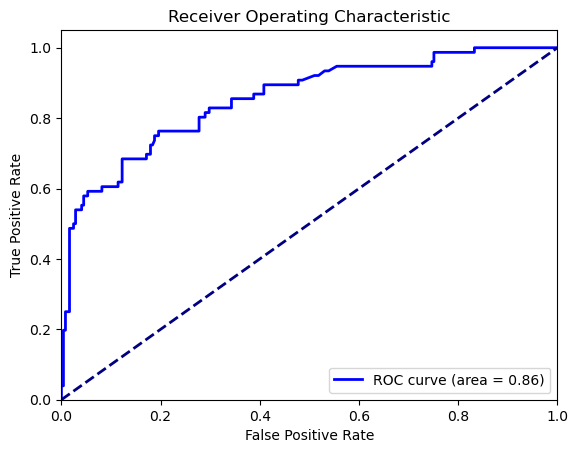

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

#select features
significant_vars = ['LOS', 'ICU_ADMIN_FLAG', 'ASA_RATING_C', 'Abnormal Flag', 'ORDER_STATUS_IMPACT', 
                    'discharge_risk_level', 'arc_peak_frequency', 'qrs_freq_power', 
                    'vf_freq_power', 'vt_freq_power']

X = df[significant_vars]
y = df['Cardiovascular'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"ROC AUC: {roc_auc}")

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [13]:
significant_vars = [ 'LOS', 'ASA_RATING_C', 'ORDER_STATUS_IMPACT', 
                    'Erythrocyte distribution width', 
                    'Erythrocyte mean corpuscular hemoglobin', 
                    'Erythrocyte mean corpuscular hemoglobin concentration', 
                    'Erythrocytes', 'cardiac_history']

X = df[significant_vars]  
y = df['Cardiovascular']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("AUC-ROC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8878504672897196
AUC-ROC Score: 0.8085392051557465
Confusion Matrix:
 [[235  10]
 [ 26  50]]


              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91       245
         1.0       0.82      0.54      0.65        76

    accuracy                           0.86       321
   macro avg       0.85      0.75      0.78       321
weighted avg       0.86      0.86      0.85       321

ROC AUC: 0.8516917293233083


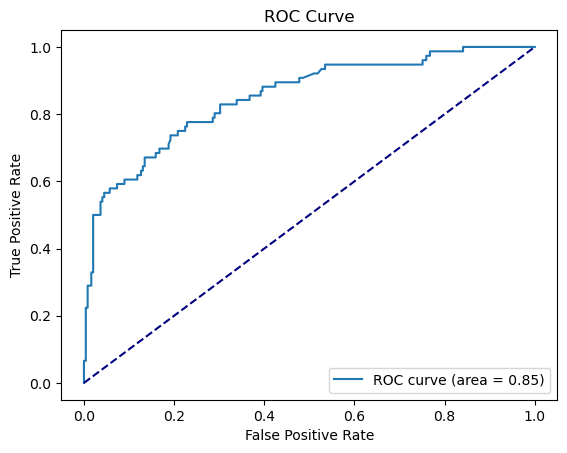

In [14]:
significant_columns = ['LOS', 'ORDER_STATUS_IMPACT', 'discharge_risk_level', 
                       'ASA_RATING_C', 'ICU_ADMIN_FLAG', 'PATIENT_CLASS_NM',
                       'diastolic_peak', 'systolic_peak', 'pulse_amplitude',
                       'arc_spectral_energy', 'arc_peak_frequency', 'Abnormal Flag']

X = df[significant_columns]
y = df['Cardiovascular']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print(classification_report(y_test, y_pred))

y_pred_prob = log_reg.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC: {roc_auc}')

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

cv_scores = cross_val_score(log_reg, X, y, cv=20, scoring='precision')

print(f'20-fold Cross-Validation precision Scores: {cv_scores}')

print(f'Mean precision: {cv_scores.mean()}')
print(f'Standard Deviation: {cv_scores.std()}')

20-fold Cross-Validation precision Scores: [1.         1.         0.85       0.75       0.6        0.8
 0.76923077 0.53846154 0.71428571 0.81818182 0.54545455 0.69230769
 0.58333333 0.73333333 0.75       0.875      0.84615385 0.76470588
 0.8        1.        ]
Mean precision: 0.7715224236547767
Standard Deviation: 0.1351088348950569


In [ ]:
#diagrams

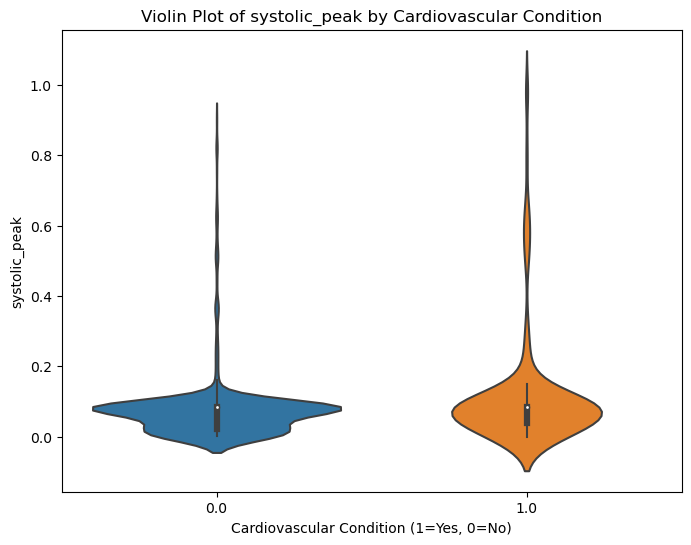

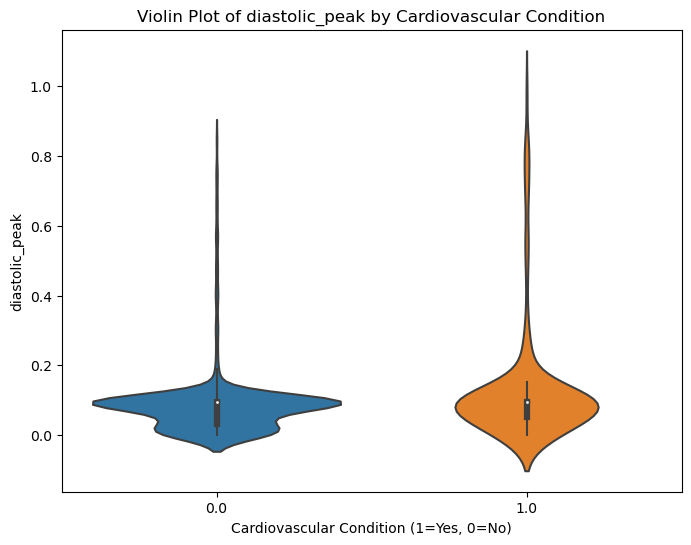

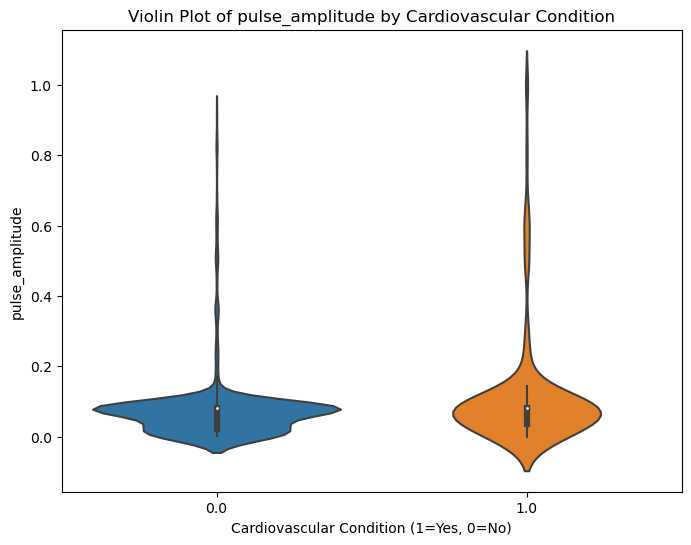

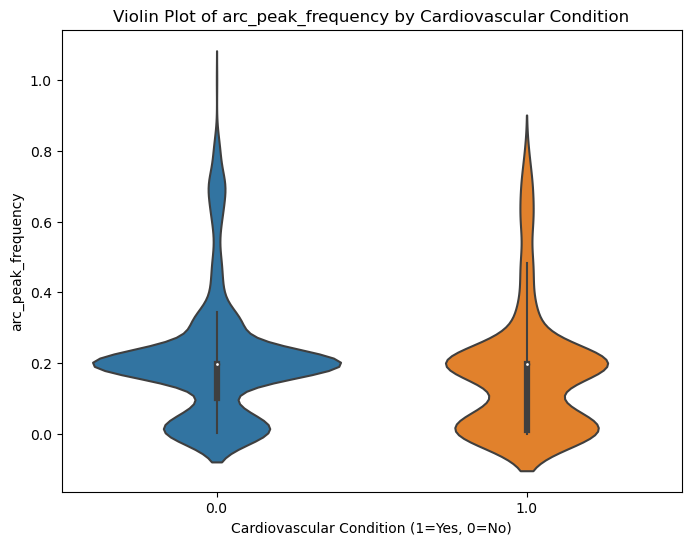

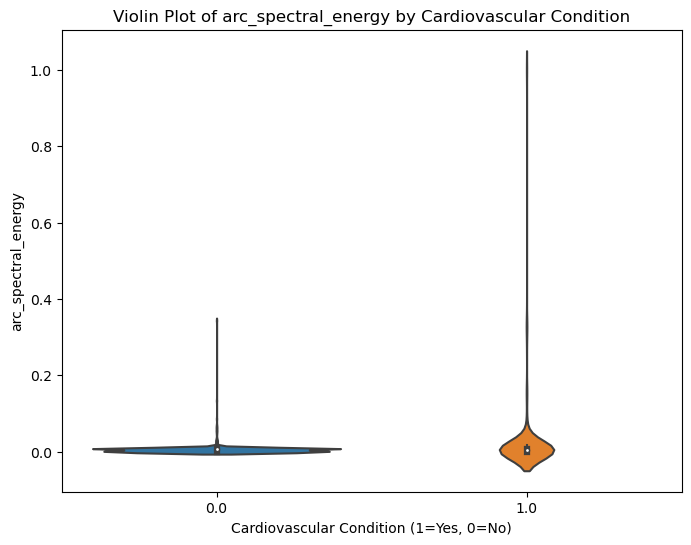

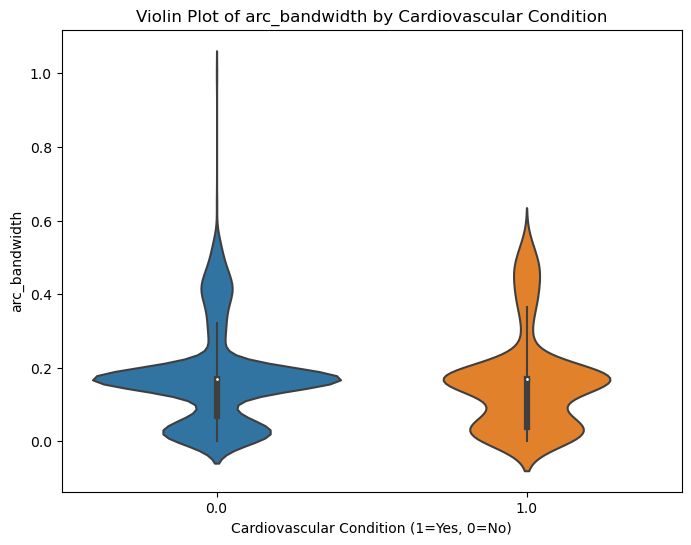

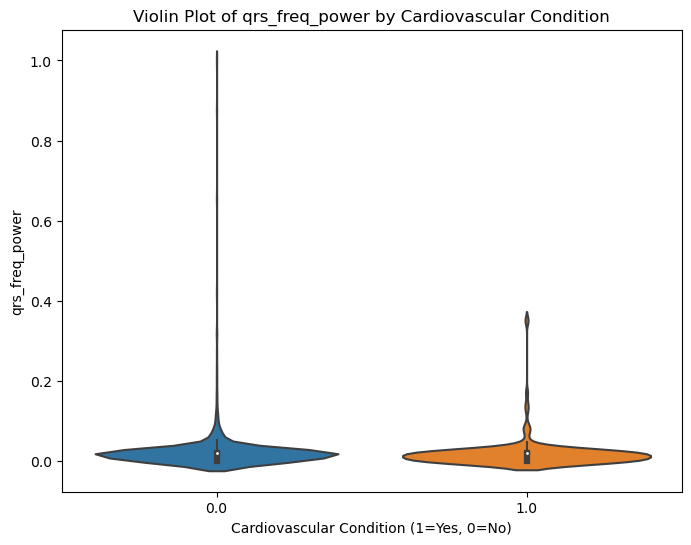

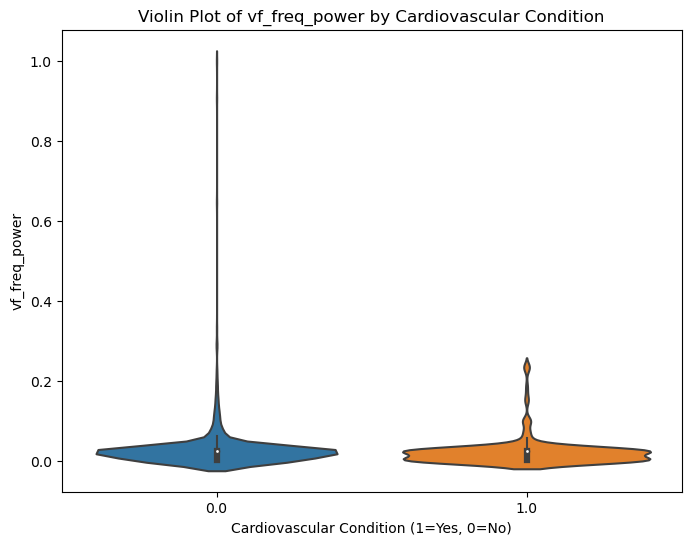

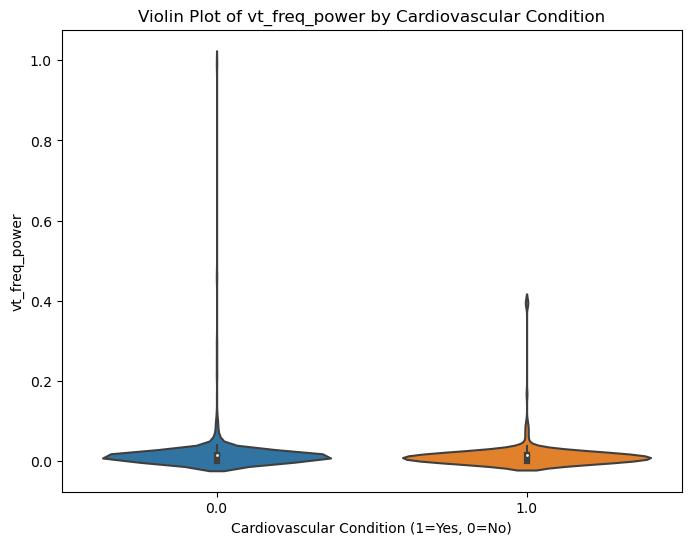

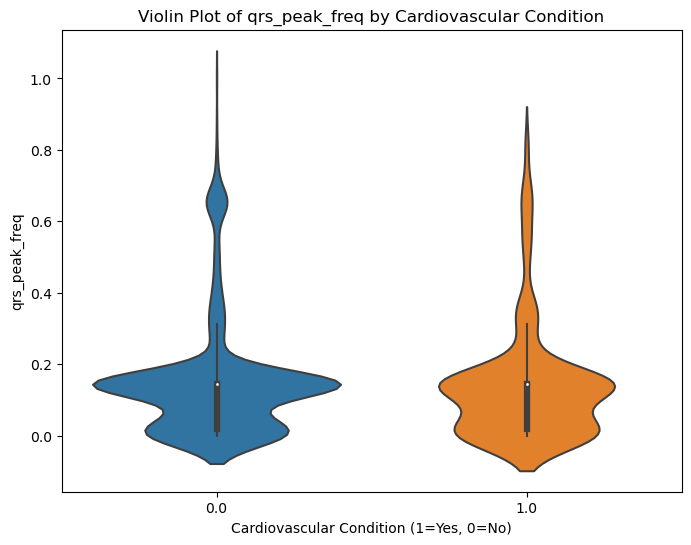

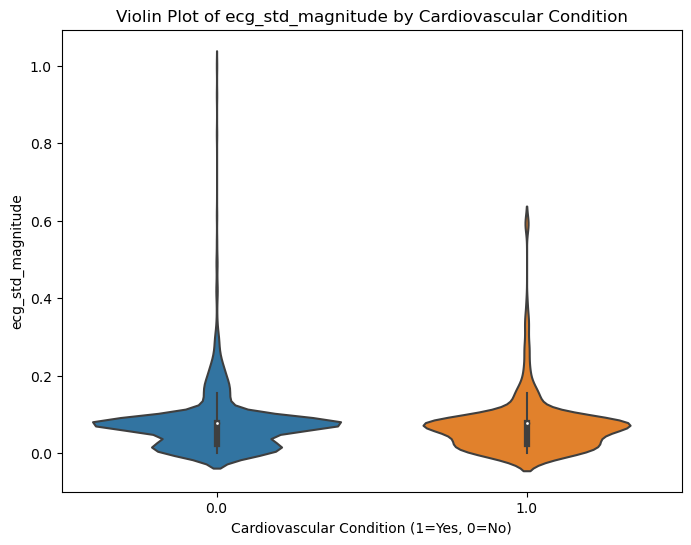

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


features = wave.columns.drop(['LOG_ID'])  

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Cardiovascular', y=feature, data=df)
    plt.title(f'Violin Plot of {feature} by Cardiovascular Condition')
    plt.xlabel('Cardiovascular Condition (1=Yes, 0=No)')
    plt.ylabel(feature)
    plt.show()

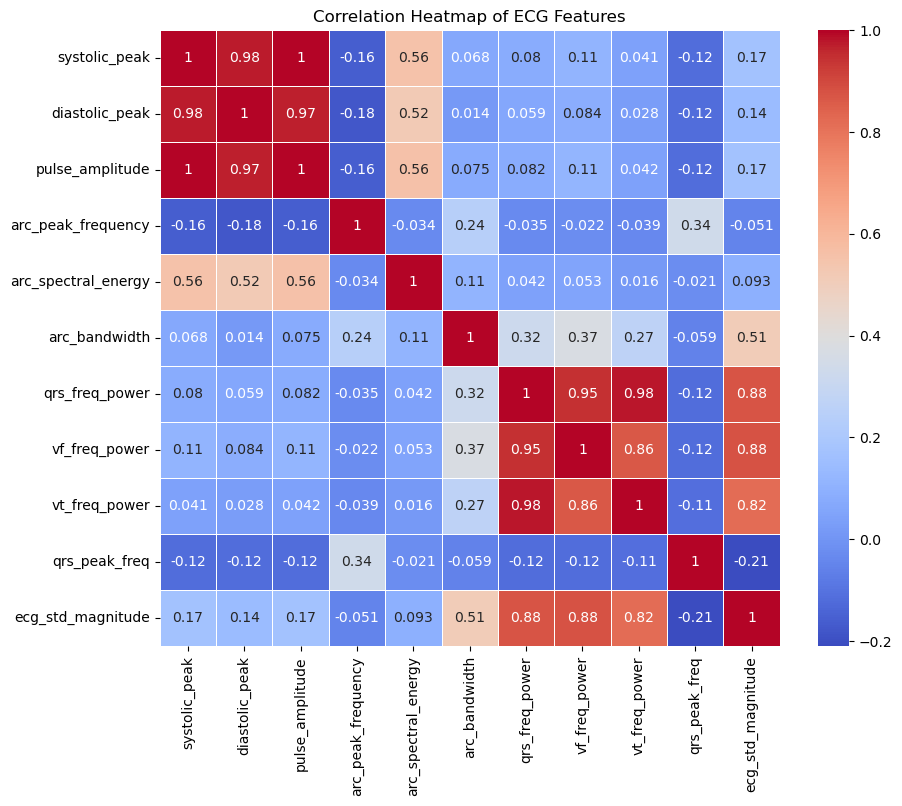

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = wave.drop(columns='LOG_ID').corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of ECG Features')
plt.show()

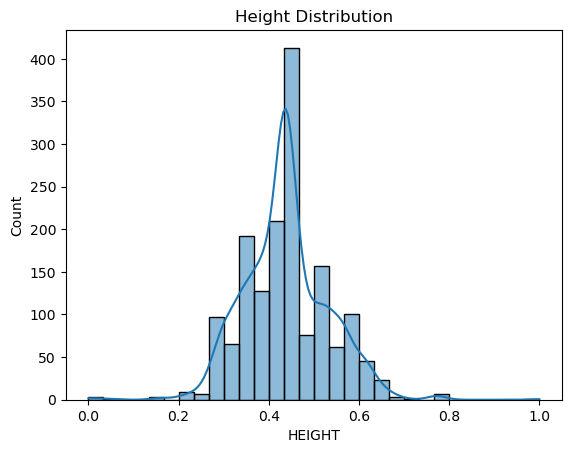

In [20]:
sns.histplot(df['HEIGHT'], bins=30, kde=True)
plt.title('Height Distribution')
plt.show()

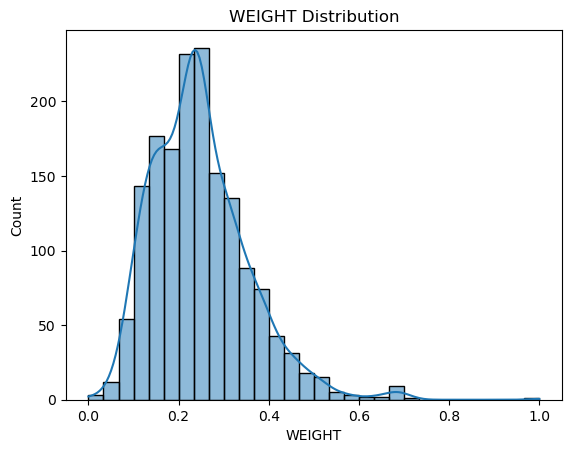

In [21]:
sns.histplot(df['WEIGHT'], bins=30, kde=True)
plt.title('WEIGHT Distribution')
plt.show()

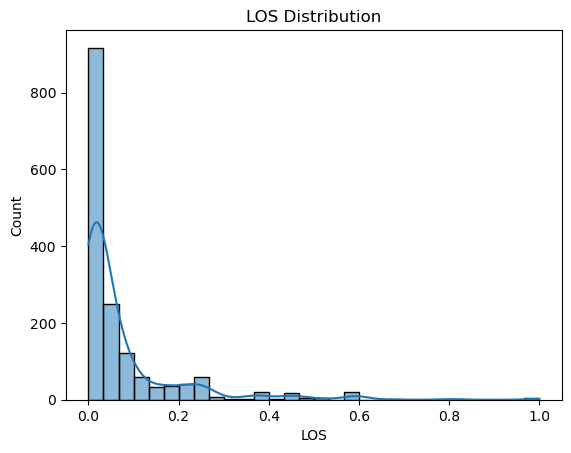

In [22]:
sns.histplot(df['LOS'], bins=30, kde=True)
plt.title('LOS Distribution')
plt.show()

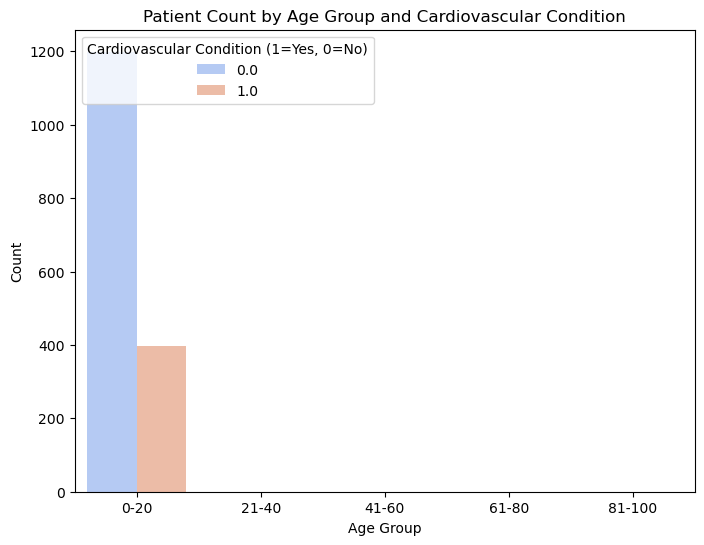

In [23]:
bins = [0, 20, 40, 60, 80, 100] 
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['AGE_GROUP'] = pd.cut(df['BIRTH_DATE'], bins=bins, labels=labels)

plt.figure(figsize=(8, 6))
sns.countplot(x='AGE_GROUP', hue='Cardiovascular', data=df, palette='coolwarm')
plt.title('Patient Count by Age Group and Cardiovascular Condition')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Cardiovascular Condition (1=Yes, 0=No)')
plt.show()


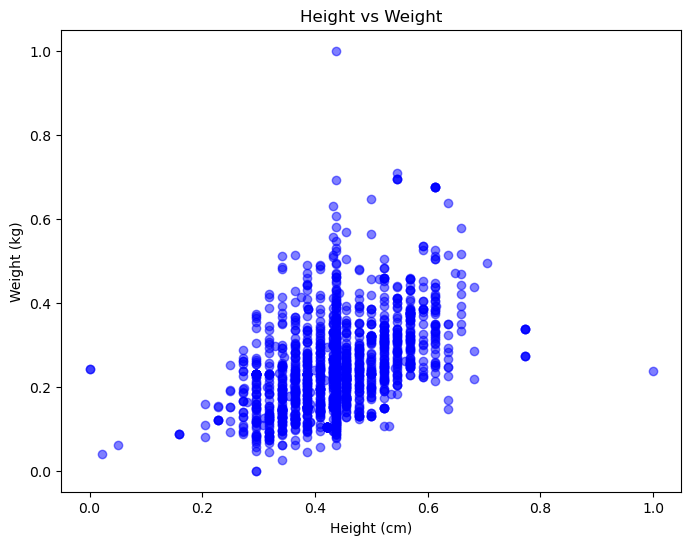

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(df['HEIGHT'], df['WEIGHT'], alpha=0.5, c='blue')
plt.title('Height vs Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

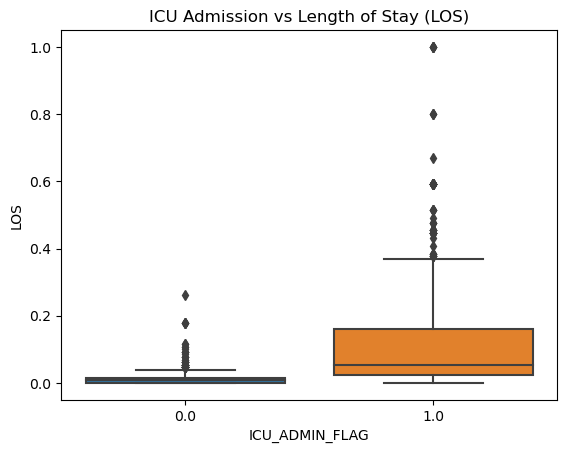

In [25]:
sns.boxplot(x='ICU_ADMIN_FLAG', y='LOS', data=df)
plt.title('ICU Admission vs Length of Stay (LOS)')
plt.show()

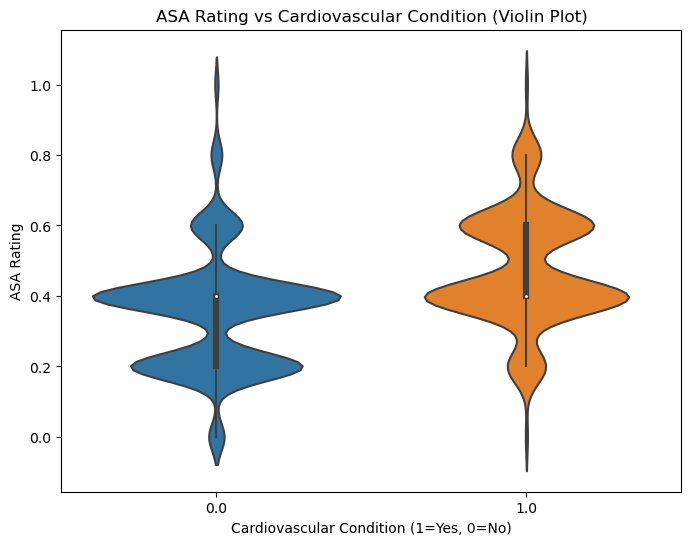

In [26]:

plt.figure(figsize=(8, 6))
sns.violinplot(x='Cardiovascular', y='ASA_RATING_C', data=df)
plt.title('ASA Rating vs Cardiovascular Condition (Violin Plot)')
plt.xlabel('Cardiovascular Condition (1=Yes, 0=No)')
plt.ylabel('ASA Rating')
plt.show()

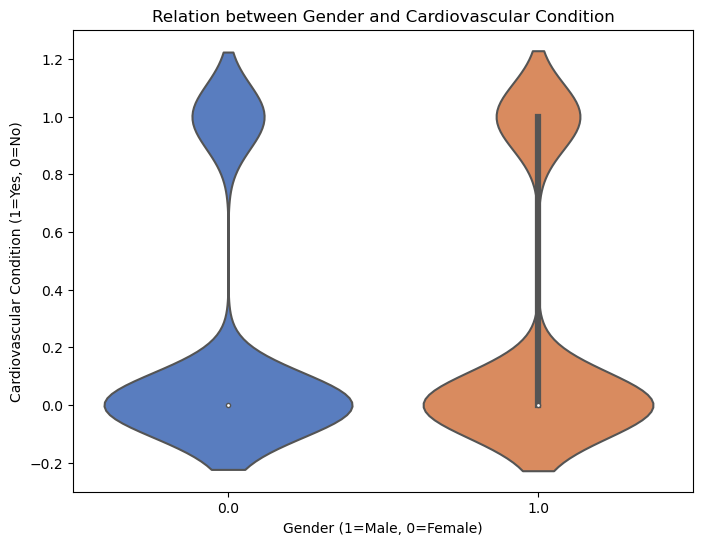

In [27]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='SEX', y='Cardiovascular', data=df, palette='muted')
plt.title('Relation between Gender and Cardiovascular Condition')
plt.xlabel('Gender (1=Male, 0=Female)')
plt.ylabel('Cardiovascular Condition (1=Yes, 0=No)')
plt.show()

<Figure size 800x600 with 0 Axes>

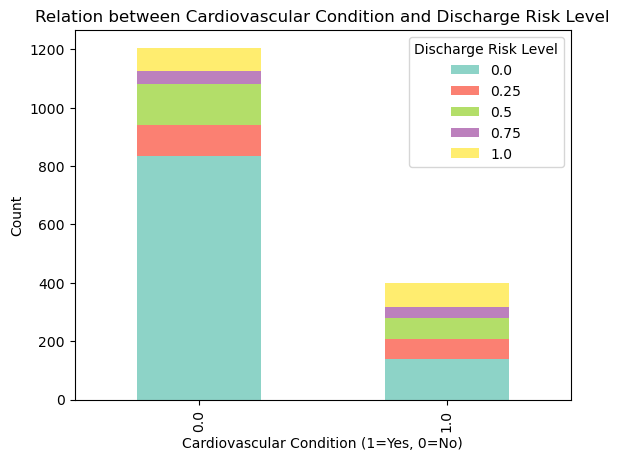

In [28]:
plt.figure(figsize=(8, 6))
pd.crosstab(df['Cardiovascular'], df['discharge_risk_level']).plot(kind='bar', stacked=True, colormap='Set3')
plt.title('Relation between Cardiovascular Condition and Discharge Risk Level')
plt.xlabel('Cardiovascular Condition (1=Yes, 0=No)')
plt.ylabel('Count')
plt.legend(title='Discharge Risk Level')
plt.show()

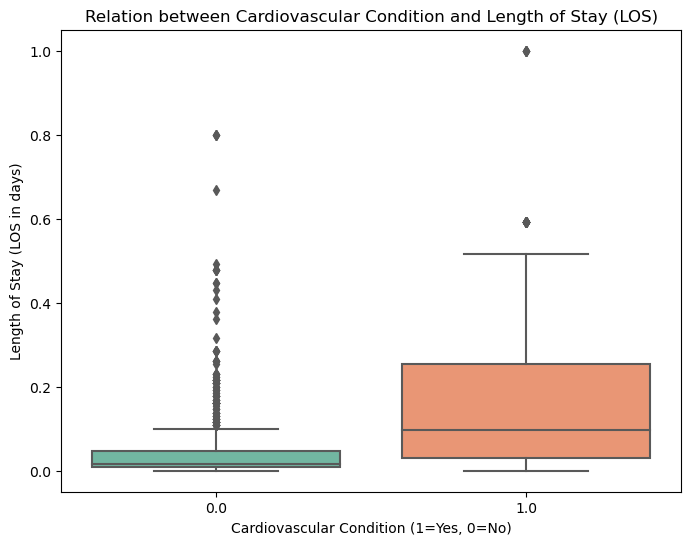

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cardiovascular', y='LOS', data=df, palette='Set2')
plt.title('Relation between Cardiovascular Condition and Length of Stay (LOS)')
plt.xlabel('Cardiovascular Condition (1=Yes, 0=No)')
plt.ylabel('Length of Stay (LOS in days)')
plt.show()
